#                                 Cyclistic Bike-share Data Analysis Project

## Author: Benard Mwinzi

## Project Summary
Cyclistic Bike-share is an imaginary bike company whose data is used in the Google Data Analytics Capstone Project. The company has a fleet of 5,800 bicycles and 600 docking stations. The company has collected a large amount of data, and the management wants to use insights from that data to influence business decisions. The marketing team wants the data to be analyzed to determine if it is a good decision to encourage its riders to become annual members to improve company sales. This project is based on the company's 2023 data because it is more recent, so more relevant to the study. The primary objective of this Data Analysis project is to determine how annual and casual members use bikes differently.

We used data to answer the following questions:

i) Which stations have the highest number of rides?

ii) Which weekday has the highest number of rides?

iii) Do annual riders have more rides than casual riders?

iv) Do annual riders have a higher average ride duration than casual riders?


## Loading the libraries

In [12]:
# loading libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

## Loading the datasets

In [2]:
# Setting the directory
directory = "D:/Data Science/Python/Coursera/Cyclistic"
# Creating an empty list
data = []
# Loading the CSV files into Dataframes
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        df = pd.read_csv(os.path.join(directory, filename))
        data.append(df)
# Merging Dataframes
annual_data = pd.concat(data, ignore_index=True)

In [3]:
#Checking the dimension of combined data
print("Annual data Shape: "+ str(annual_data.shape))

Annual data Shape: (5719877, 13)


The combined data has 5719877 rows in 13 columns. The index column needs to be dropped

## Data Cleaning

The data needed to be cleaned by removing any available duplicates, dealing with missing values, and removing outliers. New variables needed to be created too.

In [4]:
#Checking the first 5 rows
annual_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member


In [5]:
# checking data types
annual_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5719877 entries, 0 to 5719876
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 567.3+ MB


**Insights:** There are some rows with missing values, and there are some data types that need to be changed.
The ended_at and Started_at variable data types need to be changed from objects to datetime

### *Changing the data types*

In [6]:
# Change the started_at and ended_at variables to datetime data types
annual_data["started_at"] = pd.to_datetime(annual_data["started_at"])
annual_data["ended_at"] = pd.to_datetime(annual_data["ended_at"])

In [7]:
#confirming that the data types changed
annual_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5719877 entries, 0 to 5719876
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 567.3+ MB


### *Dealing with Missing Values*

In [8]:
#checking missing values for each column
annual_data.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    875716
start_station_id      875848
end_station_name      929202
end_station_id        929343
start_lat                  0
start_lng                  0
end_lat                 6990
end_lng                 6990
member_casual              0
dtype: int64

There are six columns with missing values. The station IDs and names have the highest number of missing values. The rows with missing values will be dropped since we cannot get the right data to fill them. Since the dataset is large and the rows with missing values are few dropping them won't affect the analysis outcome.

In [9]:
#dropping the missing values
df1 = annual_data.dropna()

In [10]:
#Confirming that the rows with missing values are dropped
df1.isna().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

The rows with missing values were all dropped.

### *Creating new variables*

We need to create the ride duration variable by subtracting the ended_at variable from the started_at variable. We shall also create a week day name variable from the started_at variable.

In [13]:
#Creating a duration variable
df1["duration"] = (df1["ended_at"]-df1["started_at"]).dt.total_seconds()/60

In [14]:
#creating the weekday variable
df1["weekday"] = df1["started_at"].dt.day_name()

In [15]:
#Checking the first few columns of the complete and consistent data
df1.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,weekday
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member,10.850000,Saturday
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,8.483333,Tuesday
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual,13.233333,Monday
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,8.766667,Sunday
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,15.316667,Thursday


### *Investigating the presence of outliers*

Since we now have a continuous variable (duration), we need to investigate if there might be outliers in the data.

In [16]:
#Checking the data summary
df1.describe()

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,duration
count,4331707,4331707,4.331707e+06,4.331707e+06,4.331707e+06,4.331707e+06,4.331707e+06
mean,2023-07-15 19:09:13.486048,2023-07-15 19:25:10.596928768,4.190095e+01,-8.764466e+01,4.190137e+01,-8.764487e+01,1.595185e+01
min,2023-01-01 00:02:06,2023-01-01 00:07:23,4.164850e+01,-8.784409e+01,0.000000e+00,-8.784406e+01,-5.456667e+01
25%,2023-05-20 13:02:18,2023-05-20 13:23:20.500000,4.188090e+01,-8.765766e+01,4.188096e+01,-8.765842e+01,5.616667e+00
50%,2023-07-20 15:12:22,2023-07-20 15:29:43,4.189636e+01,-8.764170e+01,4.189662e+01,-8.764182e+01,9.800000e+00
75%,2023-09-16 16:19:20.500000,2023-09-16 16:39:39,4.192677e+01,-8.762858e+01,4.192877e+01,-8.762858e+01,1.748333e+01
max,2023-12-31 23:58:55,2024-01-01 14:20:23,4.206487e+01,-8.752823e+01,4.206485e+01,0.000000e+00,1.213630e+04
std,NaN,NaN,4.301374e-02,2.490093e-02,5.549544e-02,7.712000e-02,3.608719e+01


[Text(0.5, 1.0, 'Duration Distriution')]

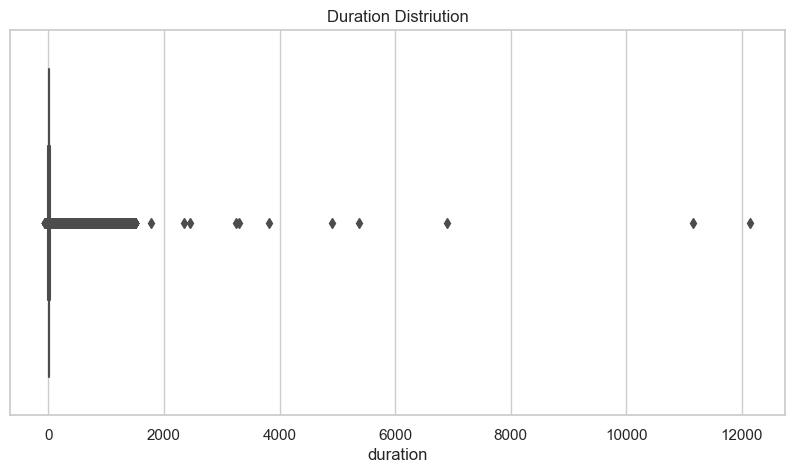

In [24]:
#creating a boxplot for the duration variable
plt.figure(figsize = (10,5))
sns.set(style="whitegrid")
sns.boxplot(x =df1["duration"]).set(title= "Duration Distriution")

The Box plot shows that our dataset may contain some outliers. Some extreme values are in the upper end of the data, but a rider can borrow a bike for a long time. Therefore, the extreme values on the upper end were not dropped. The summary statistics show some observations where the duration variable is negative.  The negative values in the duration column are an error because there is no way that the start time should be greater than the end time. Therefore, we will drop all rows where the duration is less than 0.

In [19]:
#Isolating the rows with a negative ride duration
df1[df1["duration"] < 0]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,weekday
1001391,7A4D237E2C99D424,electric_bike,2023-04-04 17:15:08,2023-04-04 17:15:05,Green St & Randolph St*,chargingstx3,Green St & Randolph St*,chargingstx3,41.883615,-87.648556,41.883602,-87.648627,member,-0.050000,Tuesday
1001407,81E1C5175FA5A23D,classic_bike,2023-04-19 14:47:18,2023-04-19 14:47:14,Green St & Randolph St*,chargingstx3,Green St & Randolph St*,chargingstx3,41.883602,-87.648627,41.883602,-87.648627,member,-0.066667,Wednesday
1001487,0063C3704F56EC55,electric_bike,2023-04-27 07:51:14,2023-04-27 07:51:09,Green St & Randolph St*,chargingstx3,Green St & Randolph St*,chargingstx3,41.883460,-87.648600,41.883602,-87.648627,casual,-0.083333,Thursday
1074322,934174DB8E2AD791,classic_bike,2023-05-29 17:34:21,2023-05-29 17:34:09,Lakefront Trail & Bryn Mawr Ave,15576,Lakefront Trail & Bryn Mawr Ave,15576,41.984044,-87.652281,41.984044,-87.652281,member,-0.200000,Monday
1275354,00AC4040E25E347E,classic_bike,2023-05-07 15:54:58,2023-05-07 15:54:47,Wentworth Ave & Cermak Rd*,chargingstx07,Wentworth Ave & Cermak Rd*,chargingstx07,41.853214,-87.631872,41.853214,-87.631872,casual,-0.183333,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5483380,83192DD2002545D0,classic_bike,2023-11-05 01:59:44,2023-11-05 01:12:56,Racine Ave & 13th St,13165,Emerald Ave & 31st St,TA1309000055,41.865054,-87.656959,41.838198,-87.645143,casual,-46.800000,Sunday
5515739,7C0E4814223D9710,electric_bike,2023-12-07 22:20:28,2023-12-07 22:05:49,Clifton Ave & Armitage Ave,TA1307000163,W Armitage Ave & N Sheffield Ave,20254.0,41.918226,-87.656975,41.917805,-87.653449,member,-14.650000,Thursday
5522160,C8877899E19F9ECE,classic_bike,2023-12-27 13:39:26,2023-12-27 13:39:25,State St & Chicago Ave,21544,State St & Chicago Ave,21544,41.896617,-87.628579,41.896617,-87.628579,member,-0.016667,Wednesday
5548757,DCA596368AD72625,electric_bike,2023-12-05 17:12:57,2023-12-05 17:12:45,Elston Ave & Cortland St,TA1305000039,Elston Ave & Cortland St,TA1305000039,41.916456,-87.666810,41.916433,-87.666746,member,-0.200000,Tuesday


There are 66 rows where the ride duration is negative. We need to drop all those rows.

In [20]:
# Droping the rows where the ride duration is negative
clean_data = df1[df1["duration"] > 0]

In [26]:
#checking the final dataset
clean_data.describe()

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,duration
count,4331138,4331138,4.331138e+06,4.331138e+06,4.331138e+06,4.331138e+06,4.331138e+06
mean,2023-07-15 19:03:01.081445120,2023-07-15 19:18:58.337543936,4.190095e+01,-8.764466e+01,4.190137e+01,-8.764487e+01,1.595427e+01
min,2023-01-01 00:02:06,2023-01-01 00:07:23,4.164850e+01,-8.784409e+01,0.000000e+00,-8.784406e+01,1.666667e-02
25%,2023-05-20 12:58:52.249999872,2023-05-20 13:19:58,4.188090e+01,-8.765766e+01,4.188096e+01,-8.765842e+01,5.616667e+00
50%,2023-07-20 15:05:49.500000,2023-07-20 15:24:58.500000,4.189636e+01,-8.764170e+01,4.189662e+01,-8.764182e+01,9.800000e+00
75%,2023-09-16 16:16:11.750000128,2023-09-16 16:36:31.500000,4.192677e+01,-8.762858e+01,4.192877e+01,-8.762858e+01,1.748333e+01
max,2023-12-31 23:58:55,2024-01-01 14:20:23,4.206487e+01,-8.752823e+01,4.206485e+01,0.000000e+00,1.213630e+04
std,NaN,NaN,4.301366e-02,2.490003e-02,5.549678e-02,7.712425e-02,3.608875e+01


In [27]:
#Checking the size of the clean data
clean_data.shape

(4331138, 15)

Now, our dataset is complete (has no missing values), the data types are consistent, and it is free from outliers. We also have all the columns we need to answer the research questions in this project. Our final data now has 4,331,138 rows in 15 columns. The data is ready to be used to answer the research questions.

## Exploratory data analysis
### *i) Which stations have the highest number of rides?*

In [29]:
#grouping the data by start stations
rides_by_station = clean_data[["start_station_name", "ride_id"]].groupby(["start_station_name"]).count().reset_index().sort_values(by = "ride_id", ascending = False).head(10)
rides_by_station

,start_station_name,ride_id
1416,Streeter Dr & Grand Ave,59608
266,DuSable Lake Shore Dr & Monroe St,38012
569,Michigan Ave & Oak St,34777
267,DuSable Lake Shore Dr & North Blvd,33158
168,Clark St & Elm St,32964
445,Kingsbury St & Kinzie St,32301
195,Clinton St & Washington Blvd,30215
1469,Wells St & Concord Ln,30044
575,Millennium Park,28101
1420,Theater on the Lake,28033


Text(0.5, 1.0, 'Number of rides by Station')

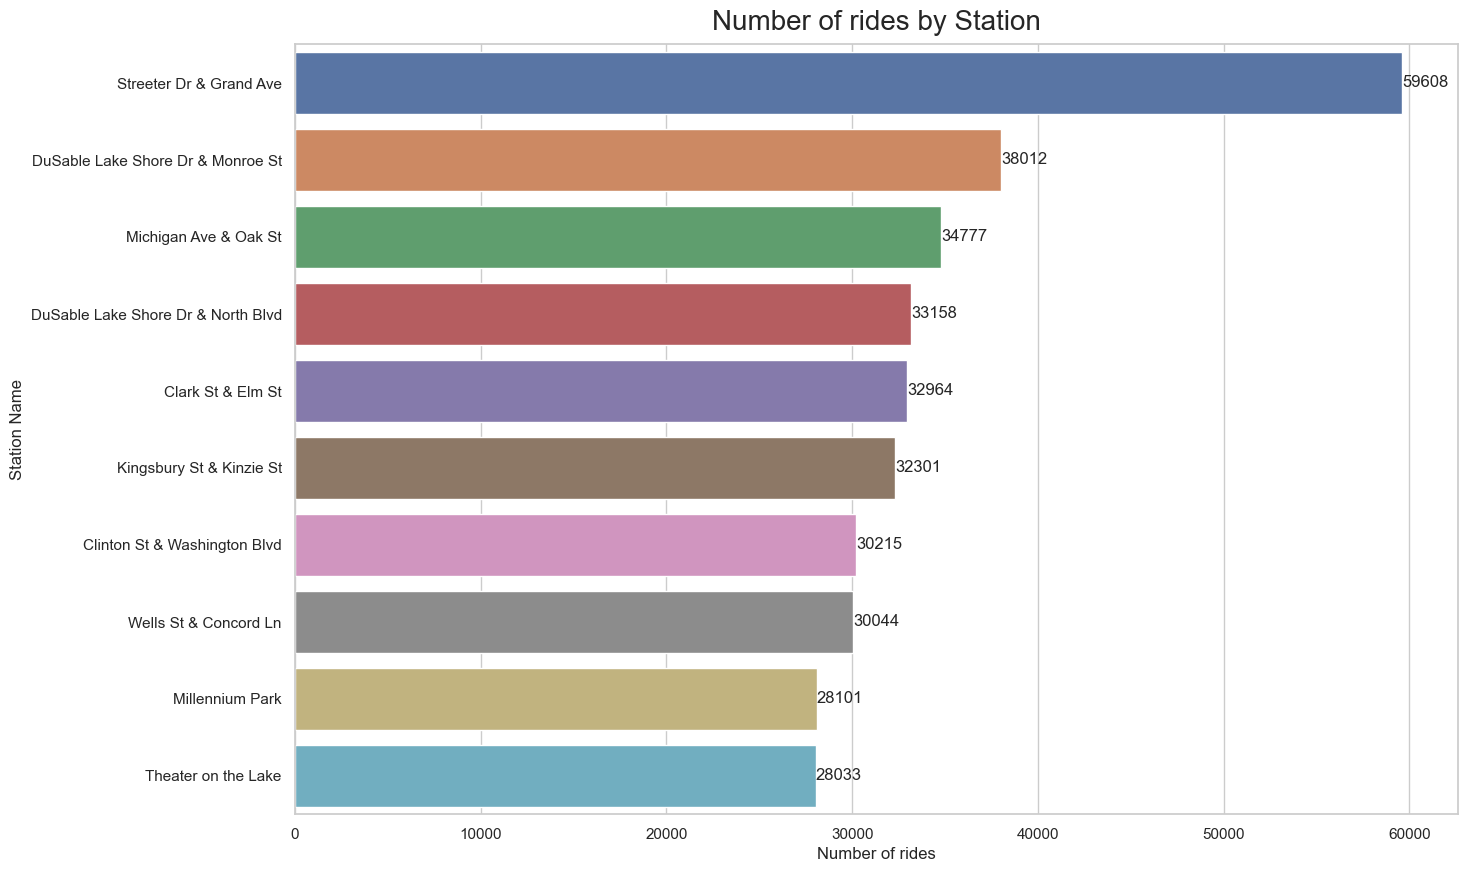

In [30]:
#creating a chart for stations with highest rides
plt.figure(figsize = (15,10))
ax = sns.barplot(y = 'start_station_name',
            x = 'ride_id',
            errwidth=0,
            data = rides_by_station)
ax.bar_label(ax.containers[0])
ax.set(ylabel = "Station Name",
      xlabel = "Number of rides",)
ax.set_title( 
  'Number of rides by Station', fontdict= { 'fontsize': 20, 'verticalalignment': 'bottom'}) 

The chart shows that Streeter Dr & Grand Ave had the highest number of rides, followed by DuSable Lake Shore Dr & Monroe St.

### *ii) Which weekday has the highest number of rides?*

In [31]:
#grouping the data by weekday and the number of rides
rides_by_weekday = clean_data[["weekday", "ride_id"]].groupby(["weekday"]).count().reset_index()
rides_by_weekday

,weekday,ride_id
0,Friday,628299
1,Monday,562033
2,Saturday,660726
3,Sunday,562532
4,Thursday,651515
5,Tuesday,630289
6,Wednesday,635744


In [32]:
#day order
weekday_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

Text(0.5, 1.0, 'Number of rides by Day Name')

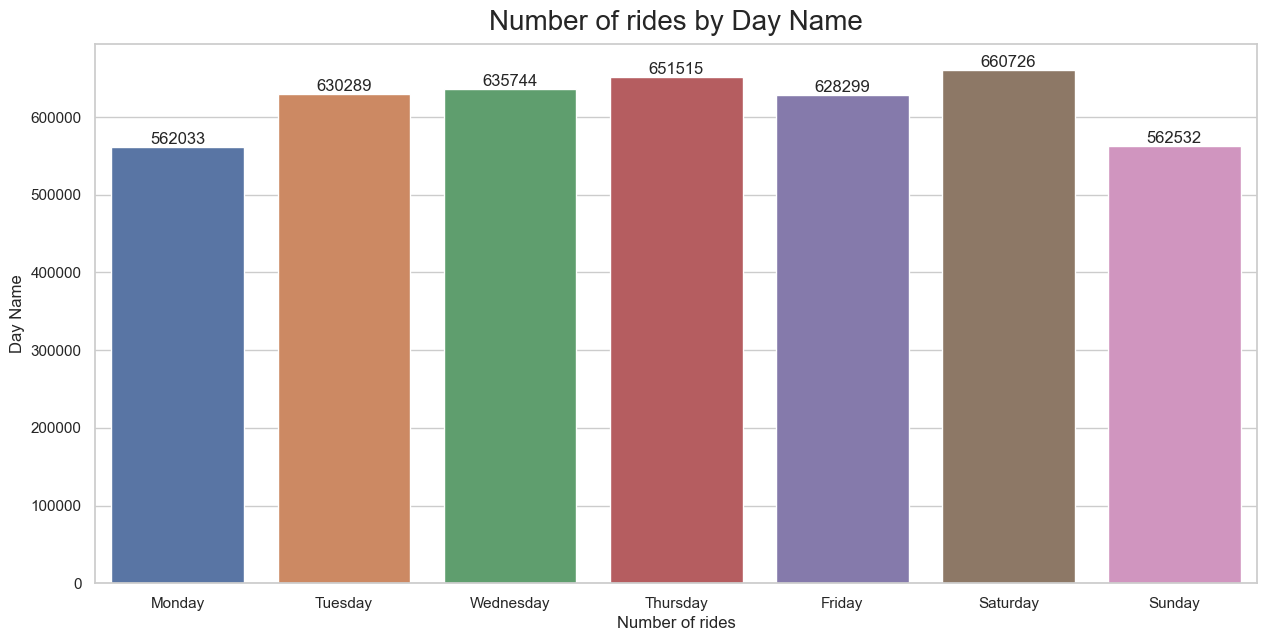

In [33]:
#creating a chart for a number of rides per weekday name
plt.figure(figsize = (15,7))
ax = sns.barplot(x = 'weekday',
            y = 'ride_id',
            order = weekday_order,
            data = rides_by_weekday)
ax.bar_label(ax.containers[0])
ax.set(ylabel = "Day Name",
      xlabel = "Number of rides",)
ax.set_title( 
  'Number of rides by Day Name', fontdict= { 'fontsize': 20, 'verticalalignment': 'bottom'})

The chart shows that all days of the week have slightly different numbers of rides. Saturdays have the highest number of rides, while Wednesday has the lowest. There is some trend in the number of rides per day of the week. The number of rides starts low on Mondays, then steadily improves on the subsequent days to Thursdays. The number of rides reduces slightly on Fridays, then increases to peak on Saturday before reducing again on Sunday.

### *iii) Do annual riders have more rides than casual riders?*

In [49]:
#grouping the data by weekday and the number of rides
rides_by_membership = clean_data[["member_casual", "ride_id"]].groupby(["member_casual"]).count().reset_index()
rides_by_membership

,member_casual,ride_id
0,casual,1531530
1,member,2799608


Text(0.5, 1.0, 'Number of rides by Membership Type')

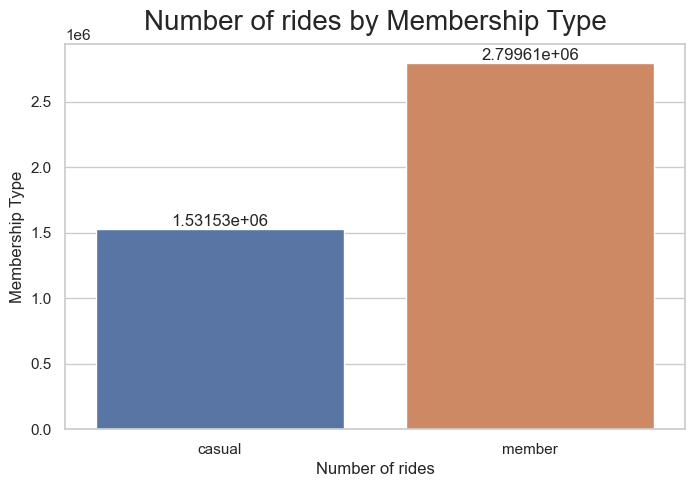

In [44]:
#creating a chart for a number of rides per weekday name
plt.figure(figsize = (8,5))
ax = sns.barplot(x = 'member_casual',
            y = 'ride_id',
            data = rides_by_membership)
ax.bar_label(ax.containers[0])
ax.set(ylabel = "Membership Type",
      xlabel = "Number of rides",)
ax.set_title( 
  'Number of rides by Membership Type', fontdict= { 'fontsize': 20, 'verticalalignment': 'bottom'})

The chart shows that members have relatively higher number of annual rides compared to casual riders.

### *v) Do annual riders have a higher average ride duration than casual riders?*

In [54]:
#grouping the data by weekday and the number of rides
duration_by_membership = clean_data[["member_casual", "duration"]].groupby(["member_casual"]).mean().reset_index()
duration_by_membership

,member_casual,duration
0,casual,22.940198
1,member,12.132604


Text(0.5, 1.0, 'Duration by Membership Type')

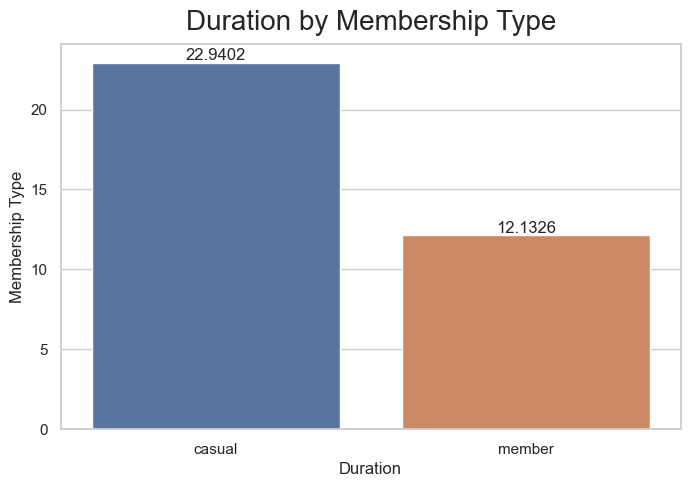

In [55]:
#creating a chart for average annual duration by member_casual
plt.figure(figsize = (8,5))
ax = sns.barplot(x = 'member_casual',
            y = 'duration',
            data = duration_by_membership)
ax.bar_label(ax.containers[0])
ax.set(ylabel = "Membership Type",
      xlabel = "Duration",)
ax.set_title( 
  'Duration by Membership Type', fontdict= { 'fontsize': 20, 'verticalalignment': 'bottom'})

The average ride duration for causal riders seems higher than for member riders. However, we need to be sure before making any conclusion. We need to conduct an A/B test to determine if the average ride duration for causal riders is significantly higher than the average ride duration for member riders.

## A/B Test

This part of our project aims to determine if the difference between the average ride duration of member riders and that of casual member riders is statistically significant.

The research question in this test is: *Is the average ride duration of casual riders statistically higher than that of member riders?*

The following are the null and alternative hypotheses of the test.

##### *H0:* The average ride duration of casual members is less or equal that of member riders.
##### *H1:* Casual members' average ride duration is greater than that of member riders.

At a 95% level of significance, the alpha shall be 0.05. The decision-making criteria shall to reject the null hypothesis if the p-value is less than 0.05.

In [58]:
# importing stats from scipy
from scipy import stats

In [67]:
casual_rider_duration = clean_data[clean_data["member_casual"] == "casual"]
member_rider_duration = clean_data[clean_data["member_casual"] == "member"]

We are comparing the sample means between two independent samples. Therefore, we shall use a two-sample t-test. It is a right-sided test.

In [73]:
stats.ttest_ind(a = casual_rider_duration["duration"], b = member_rider_duration["duration"], alternative = "greater", equal_var = False)

TtestResult(statistic=244.71111153941936, pvalue=0.0, df=1834635.3807060367)

As seen in the above output, the p-value is 0.0. This output is less than the significant level (0.05). Therefore, we have enough evidence to reject the null hypothesis.
We have enough evidence to support the claim that casual members' average ride duration is greater than that of member riders.

## Conclusion

This project aimed to determine if the company should start a marketing campaign to encourage more riders to become annual members. Based on this data for 2023 riders' information, the majority of the riders are already annual members. The average ride duration of casual riders is significantly higher than annual members. Therefore, the results of this study do not support the idea of spending money on advertising to encourage more riders to become annual members. The study shows that a rider converting into an annual member is not likely to increase their ride duration. The marketing team should look for other advertising strategies to increase ride durations.